## AT&T

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

stock_prices = pd.read_csv('stock_prices.csv')
split = int(len(stock_prices['VZ'])*0.95)
train_T = stock_prices['T'].iloc[:split]
test_T = stock_prices['T'].iloc[split:]
train_VZ = stock_prices['VZ'].iloc[:split]
test_VZ = stock_prices['VZ'].iloc[split:]

In [2]:
auto_arima_T = auto_arima(train_T, start_p=1, start_q=1, d=1, \
               max_p=15, max_q=15, information_criterion="bic")
prediction_arima_T = list(auto_arima_T.predict_in_sample())
residual_T = pd.Series(np.array(train_T) - np.array(prediction_arima_T))

In [ ]:
import matplotlib.dates as mdates
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b/%Y')


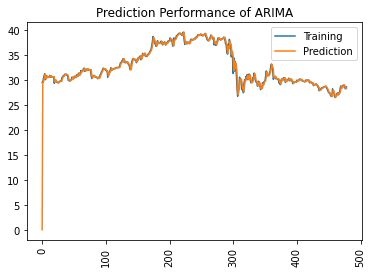

In [4]:
plt.plot(train_T.index, train_T, label='Training')
plt.plot(train_T.index, prediction_arima_T, label='Prediction')
plt.title('Prediction Performance of ARIMA')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.show()